<a href="https://colab.research.google.com/github/vedictak/Conversion-from-Epsilon-NFA-to-DFA/blob/main/automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for dfa visualization
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24

In [ ]:
### replace e with Ɛ

# print a list with given seperator and end string
def print_list(l,s='',e=''):
  #if type(l) in (list(),tuple(),set()): 
  list(l).sort()
  print(*l,sep=s,end=e)

# find and return e-closure of given state
def closure(state):
    s=state
    for i in enfa_delta:
        for j in state:
            if i[0]==j and i[1]=='e': s+=[i[2]]
    s=list(set(s))
    s.sort()
    return s

# find and return next states given state and symbol 
def delta(state,symbol):
    s = []
    for i in enfa_delta:
        if i[0]==state and i[1]==symbol: s+=[i[2]]
    s=list(set(s))
    s.sort()
    return s

def statesAcceptanceDFA(states,F):
    dfa_F = []
    for f in F:
      for s in states:
        if (f in s) and ((len(dfa_F)==0) or (s not in dfa_F)):
          dfa_F.append(s)
    return dfa_F

custom = False

nQ=6
enfa_Q = ['A','B','C','D','E','F']
enfa_q0 = 'A'
enfa_F=['F']
nsig=2
dfa_sigma = ['0','1']
ndel=11
enfa_delta=[['A','0','F'],['A','0','C'],['A','e','B'],['A','e','F'],['B','1','C'],['C','e','D'],['D','0','E'],['D','1','A'],['E','0','A'],['E','e','B'],['E','e','F']]

if custom:
  nQ = int(input("Enter the number of states :"))

  enfa_Q = []
  for i in range (nQ):
      enfa_Q += input ("Enter state " + str (i + 1) + " :")

  enfa_q0 = input ("Enter the input states :")

  enfa_F = input("Enter the acceptance states :").split(" ")

  nsig = int(input("Enter the number of symbols (excluding epsilon):"))

  dfa_sigma = []
  for i in range (nsig):
      dfa_sigma += [input ("Enter the symbol #" + str (i + 1) + " :")]

  ndel = int(input("Enter the number of transitions:"))
  
  print (" Enter the transitions in the following format: Input_State Symbol Output_State \n -> In the case of epsilon, write e in the symbol")
  i = 0
  enfa_delta = []
  tran = []
  while (i<ndel):
      tran = input ("Enter the transition #" + str (i + 1) + ":")
      tran = tran.split(" ")
      enfa_delta.append(tran)
      i += 1

print("================================================================== ")
print("eNFA")

enfa_sigma = dfa_sigma.copy()
enfa_sigma += 'e'

print()
print("set of states (Q): {",end='')
print_list(enfa_Q,s=',',e='}\n')
 
print("set of input symbols (∑): {",end='')
print_list(enfa_sigma,s=',',e='}\n')

print("initial state (q0): {",end='')
print_list(enfa_q0,s=',',e='}\n')

print("final states (F): {",end='')
print_list(enfa_F,s=',',e='}\n')

print("Transition function (δ):\n\n\t",end='')

print_list(enfa_sigma,s='\t',e='\n\n')
for i in enfa_Q:
  print(i,end="\t")
  for j in enfa_sigma: 
    d=delta(i,j)
    if d: print_list(d);
    else: print_list('-');
    print("\t",end='');
  print()

print("================================================================== ")
print("Epsilon Closures of all states:\n")

# find epsilon-closure of all the states in enfa
for i in enfa_Q:
  print('Ɛ-closure({}) = {{'.format(i),end='')
  print_list(closure([i]),s=',',e='}\n\n')

print("================================================================== ")
print("DFA")

dfa_q0 = closure([enfa_q0])
dfa_Q = [dfa_q0]
c = 0
k = 0
dfa_delta = []

while(True):
    # for every symbol in dfa
    for i in dfa_sigma:
        q1 = []
        # find delta of each enfa state in a particular dfa state
        for j in dfa_Q[k]:
            q1 += delta(j,i)
            q1 = list(set(q1))
        # add closure of all deltas as next state
        q1 = closure(q1)
        dfa_delta += [[dfa_Q[k],i,q1]]
        # if the new state is not in dfa_Q the add it
        flag = True
        for j in dfa_Q:
            if j==q1: flag=False;
        if flag:
            dfa_Q += [q1]
            c += 1
    k += 1
    # exit loop if all states are explored
    if k>c: break;

# find set of acceptance states in DFA using acceptance states of enfa and all states of dfa 
dfa_F = statesAcceptanceDFA(dfa_Q,enfa_F) 

print("set of states (Q): {",end='')
for i in range(len(dfa_Q)-1): print_list(dfa_Q[i],e=',');
print_list(dfa_Q[len(dfa_Q)-1],e='}\n')
 
print("set of input symbols (∑): {",end='')
print_list(dfa_sigma,s=',',e='}\n')

print("initial state (q0): {",end='')
print_list(dfa_q0,e='}\n')

print("final states (F): {",end='')
for i in range(len(dfa_F)-1): print_list(dfa_F[i],e=',');
print_list(dfa_F[len(dfa_F)-1],e='}\n')

print("Transition function (δ):\n\n\t",end='')

qi=0
i=0

print_list(dfa_sigma,s='\t',e='\n\n')
while(i<(len(dfa_Q)*len(dfa_sigma))):
    print_list(dfa_Q[qi], e = "\t")

    while (i<(len(dfa_sigma)*(qi+1))):
        print_list(dfa_delta[i][2],e="\t")
        i += 1
    print()
    qi += 1
print("================================================================== ")


eNFA

set of states (Q): {A,B,C,D,E,F}
set of input symbols (∑): {0,1,e}
initial state (q0): {A}
final states (F): {F}
Transition function (δ):

	0	1	e

A	CF	-	BF	
B	-	C	-	
C	-	-	D	
D	E	A	-	
E	A	-	BF	
F	-	-	-	
Epsilon Closures of all states:

Ɛ-closure(A) = {A,B,F}

Ɛ-closure(B) = {B}

Ɛ-closure(C) = {C,D}

Ɛ-closure(D) = {D}

Ɛ-closure(E) = {B,E,F}

Ɛ-closure(F) = {F}

DFA
set of states (Q): {ABF,CDF,CD,BEF}
set of input symbols (∑): {0,1}
initial state (q0): {ABF}
final states (F): {ABF,CDF,BEF}
Transition function (δ):

	0	1

ABF	CDF	CD	
CDF	BEF	ABF	
CD	BEF	ABF	
BEF	ABF	CD	


In [ ]:
def convert(l):
  w=''
  for i in l:
    w+=i
  return w

table=[]
for i in dfa_delta:
  temp=[]
  temp.append(convert(i[0]))
  temp.append(convert(i[2]))
  temp.append(int(i[1]))
  table.append(temp)
  
adfa=[]
for i in dfa_F: adfa.append(convert(i))
s=[]
for i in dfa_Q: s.append(convert(i))

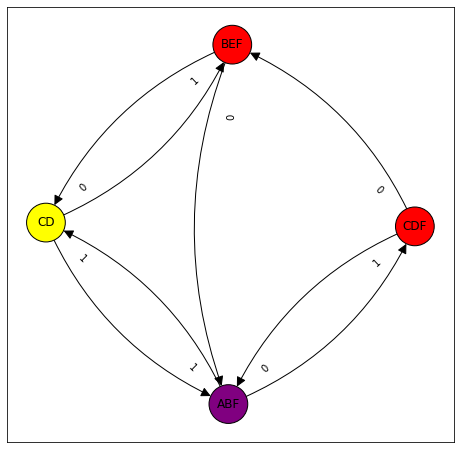

In [ ]:
# make this a function
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

dfa_G=nx.MultiDiGraph()
for i in table: dfa_G.add_edge(i[0], i[1], weight=i[2])

values=[]
for i in s:
  if i == convert(dfa_q0): 
    if i in adfa: values.append('purple')
    else: values.append('green')
  elif i in adfa: values.append('red')
  else: values.append('yellow')

edge_labels=dict([((u,v,),d['weight']) for u,v,d in dfa_G.edges(data=True)])
node_labels = {node:node for node in dfa_G.nodes()}

import pydot
from networkx.drawing.nx_agraph import graphviz_layout
pos=graphviz_layout(dfa_G,prog='sfdp')

plt.figure(figsize=(8,8))

nodes = nx.draw_networkx_nodes(dfa_G, pos, node_color = values, node_size=1500)
nodes.set_edgecolor('black')

nx.draw_networkx_edges(dfa_G,pos,arrowstyle = '-|>',arrowsize=20,edge_color='black',edge_cmap=plt.cm.Reds,connectionstyle='arc3, rad = 0.2', node_size=1500)
nx.draw_networkx_labels(dfa_G, pos, labels=node_labels)
nx.draw_networkx_edge_labels(dfa_G,pos,edge_labels=edge_labels,label_pos=0.8)
plt.show()  
# by default nodes are yellow
# green node implies initial node
# purple node implies initial and final node
# red nodes imply final nodes

# the i/p value is closer to the base of the arrow (i.e. closer to start of the edge)

In [ ]:
table=[]
for i in enfa_delta:
  temp=[]
  temp.append(convert(i[0]))
  temp.append(convert(i[2]))
  if i[1]=='e': temp.append(-1)
  else: temp.append(int(i[1]))
  table.append(temp)
  
adfa=[]
for i in enfa_F: adfa.append(convert(i))
s=[]
for i in enfa_Q: s.append(convert(i))

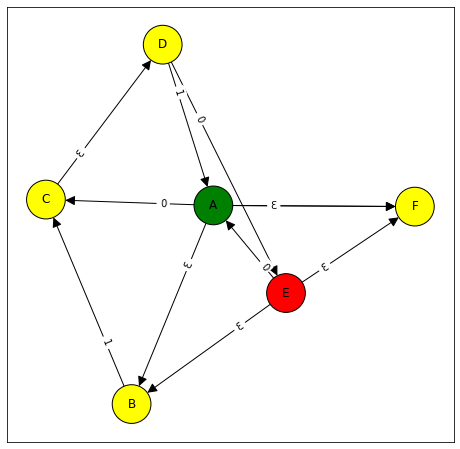

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

enfa_G=nx.MultiDiGraph()
for i in table: enfa_G.add_edge(i[0], i[1], weight=i[2] if i[2]!=-1 else 'Ɛ')

values=[]
for i in s:
  if i == convert(enfa_q0): 
    if i in adfa: values.append('purple')
    else: values.append('green')
  elif i in adfa: values.append('red')
  else: values.append('yellow')

edge_labels=dict([((u,v,),d['weight']) for u,v,d in enfa_G.edges(data=True)])
node_labels = {node:node for node in enfa_G.nodes()}

import pydot
from networkx.drawing.nx_agraph import graphviz_layout
pos=graphviz_layout(enfa_G,prog='sfdp')

plt.figure(figsize=(8,8))

nodes = nx.draw_networkx_nodes(enfa_G, pos, node_color = values, node_size=1500)
nodes.set_edgecolor('black')

nx.draw_networkx_edges(enfa_G,pos,arrowstyle = '-|>',arrowsize=20,edge_color='black',edge_cmap=plt.cm.Reds,connectionstyle='arc3, rad = 0', node_size=1500)
nx.draw_networkx_labels(enfa_G, pos, labels=node_labels)
nx.draw_networkx_edge_labels(enfa_G,pos,edge_labels=edge_labels,label_pos=0.7)
plt.show()  
# by default nodes are yellow
# green node implies initial node
# purple node implies initial and final node
# red nodes imply final nodes

# the i/p value is closer to the base of the arrow (i.e. closer to start of the edge)